In [23]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function (pyplot)
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [24]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [25]:
# copy demo into current directory
ac.copydemo('sh-half')

# start AUTO with runner object
runner = ra.runAUTO()


pgm = "sh-half"
print("\nDemo %s is started"%pgm)
print("\n%s : second run : following first snaking curve in negative direction"%pgm)
r2 = ac.run(e=pgm, c=pgm, DS=0.0005, NMX=360, NPR=1,runner=runner)
ac.save(r2,'run2')



Copying demo sh-half ... done

Demo sh-half is started

sh-half : second run : following first snaking curve in negative direction
gfortran -fopenmp -O -c sh-half.f90 -o sh-half.o
gfortran -fopenmp -O sh-half.o -o sh-half.exe /auto/lib/*.o
Starting sh-half ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)   
   1     1  EP    1   2.00000E-01   5.24380E-01   1.10378E+00   7.82024E-01   6.60058E-01   8.77432E-01
   1     2        2   2.05543E-01   5.20125E-01   1.08378E+00   7.92523E-01   6.59414E-01   8.85712E-01
   1     3        3   2.06870E-01   5.16502E-01   1.07940E+00   7.89570E-01   6.57218E-01   8.82761E-01
   1     4        4   2.06901E-01   5.16412E-01   1.07929E+00   7.89496E-01   6.57160E-01   8.82674E-01
   1     5        5   2.06949E-01   5.16273E-01   1.07913E+00   7.89387E-01   6.57079E-01   8.82566E-01
   1     6        6   2.07019E-01   5.16071E-01   1.07890E+00   7.89228E-01   6.56961E-01   8.82408E-01
   1     

Created plot


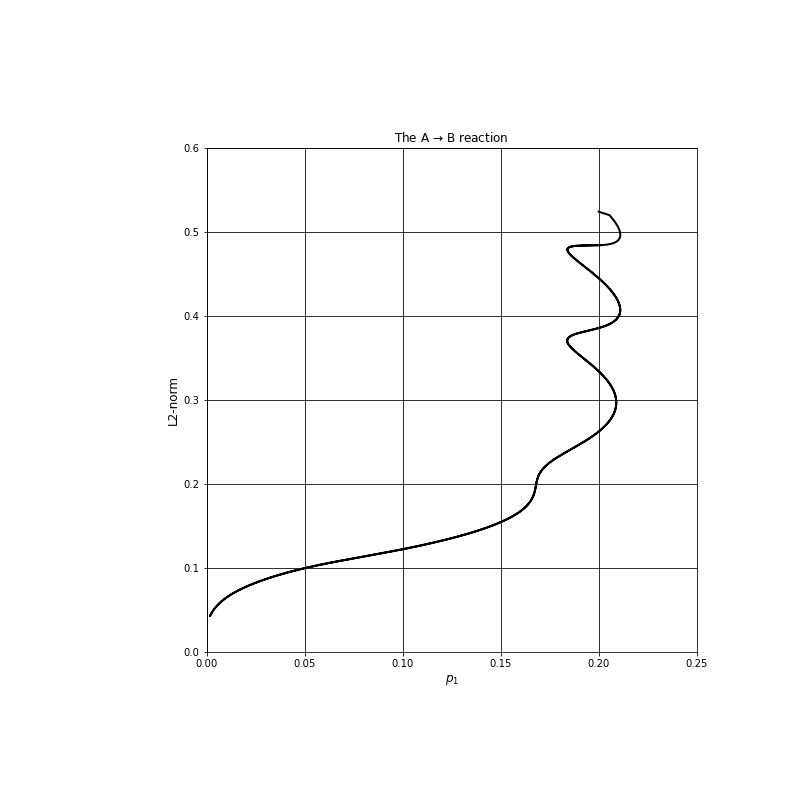

In [26]:
# plot bifurcation diagram using plot routine from AUTO
p2 = ac.plot('run2')
p2.savefig('b2.png')
display(Image.open('b2.png'))

In [11]:
# clean up files
# do not run this if you want to produce the figures below 

ac.clean()
ac.delete('run2')

Deleting fort.* *.o *.exe *.*~ ... done
Deleting b.lor ... done
Deleting s.lor ... done
Deleting d.lor ... done


In [27]:
### Creating a folder to put the figures in 
### A folder called 'backward' within the 'figures' folder, since these figures will be for the backwards run 
import numpy as np
import os 
folder_name = 'figures'
folder_path = '/auto/workspace/demos/demo/figures'
if not os.path.exists(os.path.join(folder_path, folder_name)):
    # Create the folder
    os.makedirs(os.path.join(folder_path, folder_name))
else:
    print(f"Folder '{folder_name}' already exists at '{folder_path}'")
    
folder_name_2 = 'Backward'
folder_path_2 = '/auto/workspace/demos/demo/figures/Backward'
os.makedirs(os.path.join(folder_path_2, folder_name_2))

# Now we parse the various AUTO files
import numpy as np
sol = ac.sl('run2')  # Auto command to parse the solution file 
np.shape(sol('U(1)'))
sol(1)['PAR(1)']  # This gives the value of the parameter mu at the first recorded solution 
sol(1)['U(1)']  # This extracts the 1601 data points corresponding of u(1) corresponding to the first solution 
sol(2)['U(1)']  # Same for the second solution 

b2 = ac.dg('run2')  # Auto command to parse the bifurcation diagram file 
b2(1)["L2-NORM"]  # This gives the L2-NORM corresponding to the first recorded solution 


sol(1)["t"]  # Extracts the independent variable from our solution 

Parsed file: s.run2
Parsed file: b.run2


array([0.00000000e+00, 1.62365939e-04, 3.24731879e-04, ...,
       8.16128537e-01, 9.08064269e-01, 1.00000000e+00])

In [186]:
### Example plot: the first recorded solution U(1) 

import matplotlib.pyplot as plt
import numpy as np

plt.clf()

# Generating data 
x = sol(1)["t"]
y = sol(1)['U(1)']

# Create the plot 
plt.plot(x, y)
plt.title('Solution')
plt.xlabel('x')
plt.ylabel('U(1)')

# Display the plot
#plt.show() 
plt.savefig('Figures/Backward/u1.png')

In [16]:
### Example plot: the branch point 

import matplotlib.pyplot as plt
import numpy as np

plt.clf()

# Generating data 
x = sol(195)["t"]
y = sol(195)['U(1)']

# Create the plot 
plt.plot(x, y)
plt.title('Solution')
plt.xlabel('x')
plt.ylabel('U(1)')

# Display the plot
#plt.show() 
plt.savefig('Figures/Backward/branchpoint.png')

In [7]:
### Plotting U(1) (function value) versus U(2) (its derivative) 

import matplotlib.pyplot as plt
import numpy as np

plt.clf() 

# Generating data 
x = sol(1)['U(1)']
y = sol(1)['U(2)']

# Create the plot
plt.plot(x, y)
plt.title('U(1) versus U(2)')
plt.xlabel('U(1)')
plt.ylabel('U(2)')

# Display the plot
#plt.show() 
plt.savefig('Figures/Backward/u1vsu2.png')

In [10]:
### Plotting U(1) versus U(2) and U(3) versus U(4) 

import matplotlib.pyplot as plt
import numpy as np

plt.clf()

# Generating data 
x1 = sol(1)["U(1)"]
x2 = sol(1)["U(2)"]
x3 = sol(1)["U(3)"]
x4 = sol(1)["U(4)"]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the first dataset on the first subplot
ax1.plot(x1,x2)
ax1.set_title('U(1) vs. U(2)')
ax1.set_xlabel('U(1)')
ax1.set_ylabel('U(2)')

# Plot the second dataset on the second subplot
ax2.plot(x3, x4)
ax2.set_title('U(3) vs. U(4)')
ax2.set_xlabel('U(3)')
ax2.set_ylabel('U(4)')
fig.subplots_adjust(wspace=0.5)  # Separate the plots 

# Show the figure
#plt.show() 
plt.savefig('Figures/Backward/u1u2u3u4.png')


In [12]:
### Creating an animation of U(1) vs. U(2) as we move along the branch 

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Create figure and two subplots
fig, ax = plt.subplots()

# Set title and axes labels for the first subplot
ax.set_title("U(1) vs. U(2)")
ax.set_xlabel("U(1)")
ax.set_ylabel("U(2)")

# Initialize scatter plot
x = sol(1)["U(1)"]
y = sol(1)["U(2)"]
line, = ax.plot(x,y) 

# Function to update the plot for each frame
def animate(i):
    x = sol(i+1)["U(1)"]
    y = sol(i+1)["U(2)"]
    line.set_data(x, y)
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=np.shape(sol)[0], blit=True)

# Save the animation as a .gif file
ani.save("Figures/Backward/u1u2gif.gif", writer="pillow", fps=20)


In [13]:
### Creating an animation of U(1) only as we move along the branch

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# Create some data to plot
x = sol(1)["t"]
y_values = []
for i in range(np.shape(sol)[0]): 
    y_values.append(sol(i+1)["U(1)"])

# Create a figure and axis for the plot
fig, ax = plt.subplots()
line, = ax.plot(x, y_values[0])
ax.set_title("U(1)")
ax.set_xlabel("t")
ax.set_ylabel("U(1)")

# Define the update function for the animation
def update(frame):
    y = y_values[frame % len(y_values)]
    line.set_ydata(y)
    return line,


# Create the animation
ani = FuncAnimation(fig, update, frames=len(y_values)*2, interval=500, blit=True)

# Show the animation
ani.save('Figures/Backward/u1_gif.gif', writer='pillow', fps=20)


In [16]:
### Creating an animation of the solution point moving up the snaking curve 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

# Plot the snaking curve 
x = b2["PAR(1)"]
y = b2["L2-NORM"]
ax.plot(x, y)

# Initialize the point
point, = ax.plot([], [], 'o', color='r')

# Define the animation function
def animate(i):
    x = b2(i+1)["PAR(1)"]
    y = b2(i+1)["L2-NORM"]
    point.set_data([x], [y]) # Update the coordinates of the point
    return point,

# Create the animation
ani = FuncAnimation(fig, animate, frames=np.shape(sol)[0], interval=100)

# Display the animation
ani.save('Figures/Backward/snaking_point.gif', writer='pillow', fps=20)


In [31]:
### Doing both animations at once

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create the figure and two subplots
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))

# Create the first animation on the left subplot
x1 = b2["PAR(1)"]
y1 = b2["L2-NORM"]
ax1.plot(x1, y1)
point, = ax1.plot([], [], 'o', color='r')

x2 = sol(1)["t"]
y2 = sol(1)["U(1)"]
line, = ax2.plot(x2,y2, color='b') 

# Annotating the plots
ax1.set_title("Snaking Curve: MU vs. L2-NORM")
ax1.set_xlabel("MU")
ax1.set_ylabel("L2_NORM")
ax2.set_title("Solution at the Point")
ax2.set_xlabel("t")
ax2.set_ylabel("U(1)")

def animate(i):
    x1 = b2(i+1)["PAR(1)"]
    y1 = b2(i+1)["L2-NORM"]
    x2 = sol(i+1)["t"]
    y2 = sol(i+1)["U(1)"]
    point.set_data([x1], [y1]) # Update the coordinates of the point
    line.set_data(x2, y2)
    return point, line


ani = FuncAnimation(fig, animate, frames=np.shape(sol)[0], interval=50, blit=True)

# Save the animations
ani.save('Figures/Backward/testani.gif', writer='pillow', fps=20)

In [54]:
### Colored plots

import numpy as np
import matplotlib.pyplot as plt

# Create the figure and two subplots
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,10))


# Create the first animation on the left subplot
x1 = b2["PAR(1)"]
y1 = b2["L2-NORM"]
ax1.plot(x1, y1)
point, = ax1.plot([b2(159)["PAR(1)"]], [b2(159)["L2-NORM"]], 'o', color='b')
point2, = ax1.plot([b2(195)["PAR(1)"]], [b2(196)["L2-NORM"]], 'o', color='g')
point2, = ax1.plot([b2(222)["PAR(1)"]], [b2(222)["L2-NORM"]], 'o', color='r')


x2 = sol(159)["t"]
y2 = sol(159)["U(1)"]
line, = ax2.plot(x2,y2, color='b') 

x3 = sol(195)["t"]
y3 = sol(195)["U(1)"]
line, = ax3.plot(x3,y3, color='g') 
plt.ylim(-1, 1)

x4 = sol(222)["t"]
y4 = sol(222)["U(1)"]
line, = ax4.plot(x4,y4, color='r') 

# Annotating the plots
ax1.set_title("Bifurcation Diagram - Backwards Run")
ax1.set_xlabel("MU")
ax1.set_ylabel("L2_NORM")
ax2.set_title("Solution at the Blue Point")
ax2.set_xlabel("t")
ax2.set_ylabel("U(1)")
ax3.set_title("Solution at the Green Point")
ax3.set_xlabel("t")
ax3.set_ylabel("U(1)")
ax4.set_title("Solution at the Red Point")
ax4.set_xlabel("t")
ax4.set_ylabel("U(1)")
plt.savefig('Figures/Backward/colored_graphs.png')



In [ ]:
### Creating an animation of the trajectory of a point along the U(1) vs. U(2) curve 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.clf()
fig, ax = plt.subplots()

# Plot the curve
x = sol(1)["U(1)"]
y = sol(1)["U(2)"]
ax.plot(x, y)

# Initialize the point
point, = ax.plot([], [], 'o', color='r')

# Define the animation function
def animate(i):
    x = sol(1)["U(1)"][i]
    y = sol(1)["U(2)"][i]
    point.set_data([x], [y]) # Update the coordinates of the point
    return point,

# Create the animation
ani = FuncAnimation(fig, animate, frames=1601, interval=100)

# Display the animation
ani.save('Figures/Backward/u1_u2_point.gif', writer='pillow', fps=20)
